In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [2]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [3]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [4]:
file = 'data/11.jpg'
image = cv2.imread(file)

b,g,r = cv2.split(image)
img = cv2.merge([r,g,b])

The type of this input is <class 'numpy.ndarray'>
Shape: (472, 840, 3)


(<matplotlib.image.AxesImage at 0x226a58ef400>,
 Text(0.5, 1.0, 'CIGARETTES_data/11.jpg'))

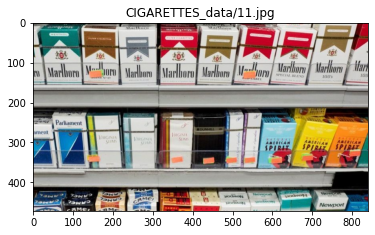

In [5]:
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape))
plt.imshow(img), plt.title(f'CIGARETTES_{file}')

In [6]:
number_of_colors = 4

In [7]:
modified_image = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [8]:
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

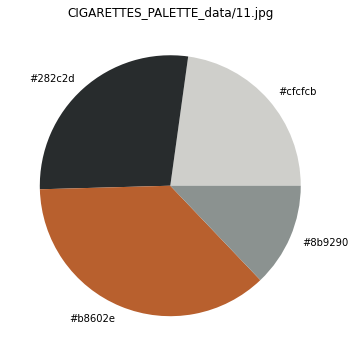

In [9]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.title(f'CIGARETTES_PALETTE_{file}')